In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as anim
import matplotlib.colors as col
import numpy as np
import scipy as sp
import pandas as pd
import time




In [212]:
class TrafficSimulation():
    
    def __init__(self,road_size,density):
        global cars, sorted_ids
        
        self.road_size = road_size
        self.density = density
        self.time_step = 0
        
        self.n_cars = round(self.road_size * self.density)
        self.road = -1*np.ones(road_size)
        
        self.initial_positions = np.random.choice(range(self.road_size),self.n_cars,replace=False)
        
        for p in self.initial_positions:
            self.road[p] = 1
    
    
        cars = [Car(id=i, position = initial_positions[i],vmax=5) for i in range(self.n_cars)]
        sorted_ids = np.array([car.id for car in sorted(cars, key = lambda x : x.position)])
        
    def draw(self):
        
        # 209,201,109;
        # 191,216,255;
        # 131,145,255;
        # 80,92,205;
        # 38,57,103]
        
        C = np.array([[255,255,255],
            [235,198,83],
            [136,230,255],
            [0,200,255],
            [0,145,255],
            [0,92,205],
            [0,57,103]])
        
        cm = col.ListedColormap(C/255.0)
        
        self.fig, self.bars = plt.subplots(1, figsize=(15,7))
        self.bars.cla()
        im = self.bars.imshow(self.road.reshape(1,self.road.shape[0]),vmin = -1, vmax = 5, cmap = cm, interpolation='none')# plt.cm.binary)
        self.bars.axis('image')
        self.bars.get_yaxis().set_visible(False)
        self.bars.set_xticks(range(0,self.road.shape[0]+1,2))
        self.bars.set_title('t = ' + str(self.time_step)) 
        
        if self.time_step == 0:
            cbaxes = self.fig.add_axes([0, 0.7, 0.8, 0.02]) 
            cb = plt.colorbar(self.bars.pcolor(self.road.reshape(1,self.road.shape[0]),vmin = -1, vmax = 5, cmap = cm)# plt.cm.binary)
            , cax = cbaxes, orientation = 'horizontal')  
        
        
        self.fig.subplots_adjust(left=0)


    def update_simulation(self):
        
        self.road.fill(-1)
        
        self.time_step += 1
        
        for car in cars:
            car.update_panorama()
            car.update_v()
            car.update_position()

            self.road[car.position] = car.v
        
        
        
        
        

class Car:
    
    def __init__(self, id, position, vmax, p_slow = 0.5):
        self.id = id
        self.position = position
        self.p_slow = p_slow
        
        self.back_car = -1
        
        self.front_car = -1
        
        self.v = 1
        self.lane = 1
        self.vmax = vmax
        
        
    def update_panorama(self):
        road_rank = np.where(sorted_ids == self.id)[0]
        self.front_car = sorted_ids[(road_rank+1) % sim.n_cars][0]
        
        
        
        self.back_car = sorted_ids[(road_rank-1) % sim.n_cars]
        
        if cars[self.front_car].position > self.position:
            self.front_gap = cars[self.front_car].position - self.position - 1
        else:
            self.front_gap = sim.road_size + (cars[self.front_car].position - self.position) - 1
        
        
        
    def update_v(self):
        if self.v < self.vmax: # rule 1
            self.v += 1
        
        if self.v > self.front_gap: # rule 2
            self.v = self.front_gap
        
        if self.v > 0 and np.random.random() < self.p_slow: #rule 3
            self.v -= 1
            
    
    def update_position(self):   
        self.position = (self.position + self.v) % sim.road_size
        
        
        
        #if cars[self.front_car].
        
    def change_lane(self):
        pass



In [156]:
road_size = 100
density = 0.4
n_cars = round(road_size * density)

road = -1*np.ones(road_size)

initial_positions = np.random.choice(range(road_size),n_cars,replace=False)

cars = [Car(id=i, position= initial_positions[i],vmax=5) for i in range(n_cars)]
sorted_ids = np.array([car.id for car in sorted(cars, key = lambda x : x.position)])



print(road)

for t in range(4):
    for car in cars:
        car.update_panorama()
        car.update_v()
        car.update_position()

        road[car.position] = car.v

    print(road)




# for i,j in enumerate(sorted_ids):
#     cars[j].front_car = sorted_ids[(i+1) % n_cars]
#     cars[j].back_car = sorted_ids[(i-1) % n_cars]


#     if cars[cars[j].front_car].position > cars[j].position:
#         cars[j].front_gap = cars[cars[j].front_car].position - cars[j].position - 1
#     else:
#         cars[j].front_gap = road_size + (cars[cars[j].front_car].position - cars[j].position) - 1
    

#     road[cars[j].position] = cars[j].v
    
# print(road)
    

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
[-1. -1.  1. -1. -1. -1. -1.  2. -1. -1. -1.  0.  0. -1.  1. -1.  1. -1.
 -1. -1. -1. -1.  0.  0. -1.  1.  0.  0.  0. -1.  1. -1.  1. -1.  2. -1.
  0. -1.  0. -1. -1. -1.  2. -1. -1. -1.  1. -1.  1.  0. -1.  1. -1.  2.
 -1. -1.  2. -1.  0. -1.  1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1.  2.  1. -1. -1.  1. -1. -1. -1. -1.  2. -1.  1. -1. -1. -1. -1.
  0.  0.  0.  0. -1.  0.  0.  0. -1.  1.]
[-1.  2.  1. -1.  2. -1. -1.  2. -1.  2. -1.  0.  0.  1.  1.  1.  1. -1.
  2. -1. -1. -1.  0.  1.  1.  0.  0.  0.  0.  1.  0. -1.  1.  1.  2.  1.
  0.  1.  0.  1. -1. -1.  2. -1. -1.  3.

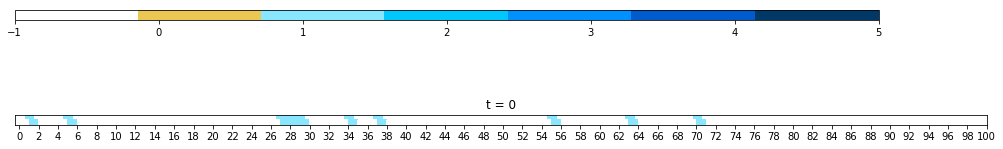

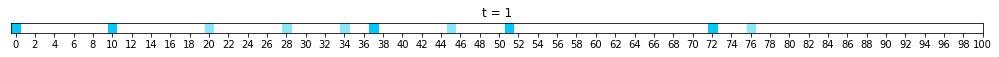

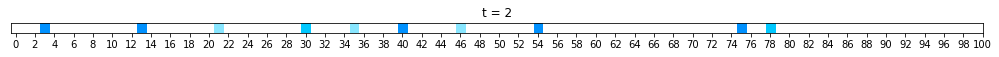

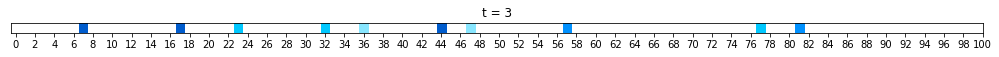

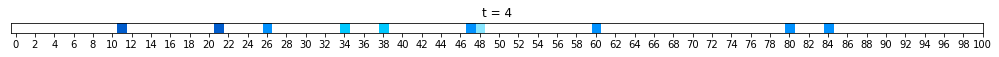

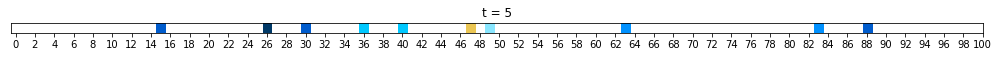

In [214]:
sim = TrafficSimulation(road_size = 100,density = 0.1)
sim.draw()
sim.update_simulation()
sim.draw()
sim.update_simulation()
sim.draw()
sim.update_simulation()
sim.draw()
sim.update_simulation()
sim.draw()
sim.update_simulation()
sim.draw()

In [102]:
np.where(sorted_ids == cars[0].id)

(array([24]),)

array([13, 14, 12,  2, 19,  1, 39, 27, 31,  3, 15, 16, 32, 29, 18, 23, 20,
       11, 10, 36, 17, 34, 21, 25,  0, 22, 30,  9,  6, 37,  4, 38, 28,  7,
       24, 33, 26,  5,  8, 35])

In [184]:
?np.ndarray.fill